In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import (
    get_spectral_gap,
    get_stationary_distribution,
    get_mixture_time
)
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
def get_markov_matrix(n, p):
    markov_matrix = np.zeros((n, n), dtype=float)
    go_back_prob = 1-p
    markov_matrix[0,0] = go_back_prob
    markov_matrix[0,1] = p
    for i in range(1, n-1):
        markov_matrix[i,0] = go_back_prob
        markov_matrix[i,i+1] = p
    markov_matrix[n-1, 0] = go_back_prob
    markov_matrix[n-1, n-1] = p
    return markov_matrix

In [3]:
n = 10
epsilon = 1e-6
results = {
    .1: {
        'marker': 'x'
    },
    .25: {
        'marker': 'o'
    },
    .5: {
        'marker': 'v'
    },
    .75: {
        'marker': '^'
    },
    .9: {
        'marker': 's'
    }
}

for p in results.keys():
    print(f'Computing for p = {p}')
    results[p]['transition_matrix'] = get_markov_matrix(n, p)
    (
        results[p]['gap'],
        results[p]['eigenvalues'],
        results[p]['eigenvectors']
    ) = get_spectral_gap(results[p]['transition_matrix'])
    (results[p]['stationary_distribution'],
    results[p]['residuals'], 
    _,
    results[p]['singular_values']) = get_stationary_distribution(results[p]['transition_matrix'])
    (results[p]['mixture_time'],
     results[p]['variation']) = get_mixture_time(
        epsilon,
        results[p]['transition_matrix'],
        results[p]['stationary_distribution']
    )

Computing for p = 0.1
Computing for p = 0.25
Computing for p = 0.5
Computing for p = 0.75
Computing for p = 0.9


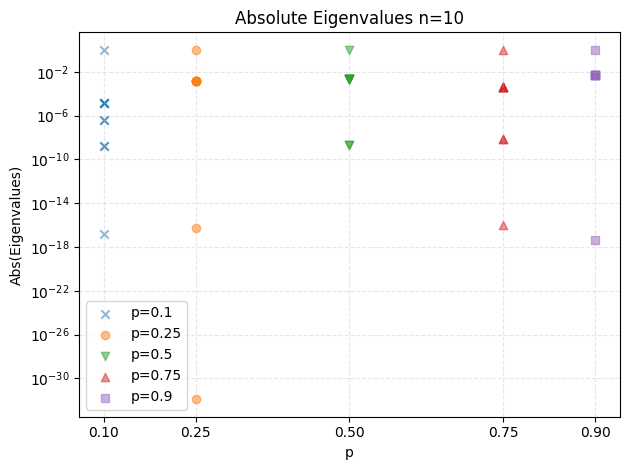

In [4]:
fig, ax = plt.subplots()
ax.set(
    title=f"Absolute Eigenvalues n={n}",
    xlabel='p',
    ylabel='Abs(Eigenvalues)',
    yscale='log',
    xticks=list(results.keys()),
)
for p, p_results in results.items():
    ax.scatter(
        np.full(len(p_results['eigenvalues']), p),
        np.abs(p_results['eigenvalues']),
        marker=p_results['marker'],
        label=f'p={p}',
        alpha=.5
    )
ax.grid(linestyle='--', alpha=.3)
ax.legend()
fig.tight_layout()

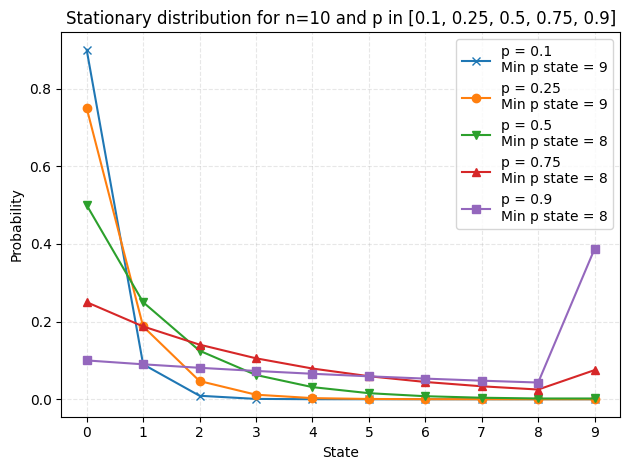

In [8]:
fig, ax = plt.subplots()
ax.set(
    title=f"Stationary distribution for n={n} and p in {list(results.keys())}",
    xlabel='State',
    ylabel='Probability',
    xticks=np.arange(n),
)
ax.grid(linestyle='--', alpha=.3)
for p, p_results in results.items():
    ax.plot(np.arange(n),
            p_results['stationary_distribution'],
            label=(f'p = {p}\n'
                   f'Min p state = {np.argmin(p_results["stationary_distribution"])}'),
            marker=p_results['marker'])
ax.legend()
fig.tight_layout()

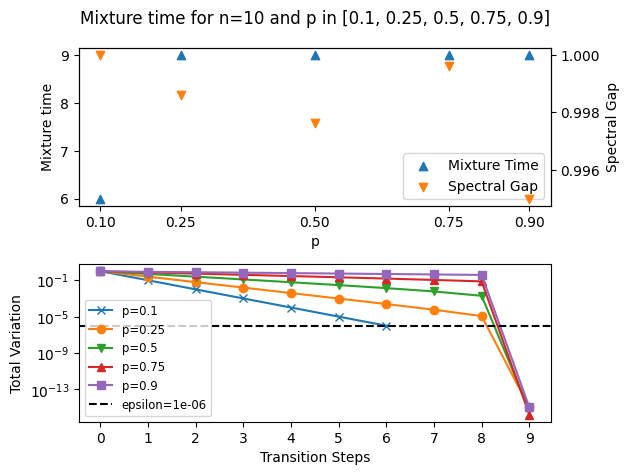

In [6]:
fig, axes = plt.subplots(2,1)
axes[0].set(
    ylabel='Mixture time',
    xticks=list(results.keys()),
    xlabel='p'
)
# axes[0].grid(linestyle='--', alpha=.3)
upper_ax_twinx = axes[0].twinx()
ps = np.sort(list(results.keys()))
gaps = np.array([results[p]['gap'] for p in ps])
mixture_times = np.array([results[p]['mixture_time'] for p in ps])
scatters = []
scatters.append(
    axes[0].scatter(ps, mixture_times, marker='^', label='Mixture Time',
                    color=color_cycle[0])
)
scatters.append(
    upper_ax_twinx.scatter(ps, gaps, marker='v', label='Spectral Gap',
                           color=color_cycle[1])
)
upper_ax_twinx.set(
    ylabel='Spectral Gap'
)
axes[0].legend(scatters, [s.get_label() for s in scatters])
for p, p_results in results.items():
    transitions = np.arange(len(p_results['variation']))
    axes[1].plot(transitions,
                 p_results['variation'],
                 marker=p_results['marker'],
                 label=f'p={p}')
axes[1].set(
    xlabel='Transition Steps',
    ylabel='Total Variation',
    xticks=np.arange(axes[1].get_xlim()[-1]),
    yscale='log',
)
axes[1].axhline(
    y=epsilon,
    color='k',
    linestyle='--',
    label=f'epsilon={epsilon}'
)
axes[1].legend(fontsize='small')
fig.suptitle(f"Mixture time for n={n} and p in {list(results.keys())}")
fig.tight_layout()